In [1]:
import pden
import pden.Net
import pden.Operations
import pden.PDENet

import tensorflow as tf

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import clear_output

%load_ext autoreload
%autoreload 1

%aimport pden.Net
%aimport pden.Operations
%aimport pden.PDENet

/Users/hegnatin/PycharmProjects/ppde/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hegnatin/PycharmProjects/ppde/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hegnatin/PycharmProjects/ppde/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hegnatin/PycharmPr

In [2]:
def der(y, x, y_shape: int, x_shape: int):
    ys = tf.split(y, [1] * y_shape, 1)
    def _der(i, j=[]):
        f = ys[i]
        for _j in j:
            fs = tf.gradients(f, x)[0]
            f  = tf.split(fs, [1] * x_shape, 1)[_j]        
        return f
    return _der

In [3]:
def div(y, x, y_shape: int, x_shape: int):
    der_gen = der(y, x, y_shape, x_shape)
    DIV = der_gen(0, j=[0])
    for i in range(1, x_shape):
        DIV += der_gen(0, j=[i])
    return DIV

def laplacian(y, x, y_shape: int, x_shape: int):
    der_gen = der(y, x, y_shape, x_shape)
    LAP = der_gen(0, j=[0, 0])
    for i in range(1, x_shape):
        LAP += der_gen(0, j=[i, i])
    return LAP

In [4]:
k = 8

net_1 = pden.Net.BasicNet(
    pden.Operations.Linear(feature_out=k, feature_in=1, random_init = True),
#     pden.Operations.ActivationFunction(tf.nn.tanh),
#     pden.Operations.Linear(feature_out=k, feature_in=k, random_init = True),
    pden.Operations.ActivationFunction(tf.cos)
)

net_2 = pden.Net.BasicNet(
    pden.Operations.Linear(feature_out=k, feature_in=1, random_init = True),
#     pden.Operations.ActivationFunction(tf.nn.tanh),
#     pden.Operations.Linear(feature_out=k, feature_in=k, random_init = True),
    pden.Operations.ActivationFunction(tf.cos)
)

net_3 = pden.Net.BasicNet(
    pden.Operations.Linear(feature_out=1, feature_in=k, random_init = True)
)

net_4 = pden.Net.BasicNet(
    pden.Operations.Linear(feature_out=k, feature_in=1, random_init = True),
#     pden.Operations.ActivationFunction(tf.nn.tanh),
#     pden.Operations.Linear(feature_out=k, feature_in=k, random_init = True),
    pden.Operations.ActivationFunction(tf.cos)
)

net_5 = pden.Net.BasicNet(
    pden.Operations.Linear(feature_out=k, feature_in=1, random_init = True),
#     pden.Operations.ActivationFunction(tf.nn.tanh),
#     pden.Operations.Linear(feature_out=k, feature_in=k, random_init = True),
    pden.Operations.ActivationFunction(tf.cos)
)

net_6 = pden.Net.BasicNet(
    pden.Operations.Linear(feature_out=1, feature_in=k, random_init = True)
)

pnet_u = pden.PDENet.HadamardNET(dimension_in=2, nets=[net_4, net_5, net_6], hidden=k)
pnet_v = pden.PDENet.HadamardNET(dimension_in=2, nets=[net_4, net_5, net_6], hidden=k)

print(net_1)
print(net_2)
print(net_3)

print(net_4)
print(net_5)
print(net_6)

Net 12:
	6	Linear: [1 -> 8]
	17	Activation funciton: <function cos at 0x1268c5290>
Net 0:
	18	Linear: [1 -> 8]
	11	Activation funciton: <function cos at 0x1268c5290>
Net 18:
	14	Linear: [8 -> 1]
Net 9:
	19	Linear: [1 -> 8]
	4	Activation funciton: <function cos at 0x1268c5290>
Net 19:
	4	Linear: [1 -> 8]
	23	Activation funciton: <function cos at 0x1268c5290>
Net 13:
	30	Linear: [8 -> 1]


In [5]:
x = tf.placeholder(tf.float64, [None, 2])
u = pnet_u.forward(x)
v = pnet_v.forward(x)

x0 = tf.placeholder(tf.float64, [None, 2])
u_x0 = pnet_u.forward(x0)
v_x0 = pnet_v.forward(x0)

y0 = tf.placeholder(tf.float64, [None, 2])
u_y0 = pnet_u.forward(y0)
v_y0 = pnet_v.forward(y0)

y1 = tf.placeholder(tf.float64, [None, 2])
u_y1 = pnet_u.forward(y1)
v_y1 = pnet_v.forward(y1)

x1 = tf.placeholder(tf.float64, [None, 2])
u_x1 = pnet_u.forward(x1)
v_x1 = pnet_v.forward(x1)

der_u_gen = der(u, x, 1, 2)
der_v_gen = der(v, x, 1, 2)

laplacian_u = laplacian(u, x, 1, 2)
laplacian_v = laplacian(v, x, 1, 2)

du_dx = der_u_gen(0, j=[0])
du_dy = der_u_gen(0, j=[1])
dv_dx = der_v_gen(0, j=[0])
dv_dy = der_v_gen(0, j=[1])

du_dxdy = der_u_gen(0, j=[0, 1])
dv_dydx = der_v_gen(0, j=[1, 0])
du_dxdx = der_u_gen(0, j=[0, 0])
du_dydy = der_u_gen(0, j=[1, 1])

dv_dxdx = der_v_gen(0, j=[0, 0])
dv_dydy = der_v_gen(0, j=[1, 1])

In [6]:
E = 1
nu= 0.3

lam = (E * nu) / ((1 + nu) * (1 - 2 * nu))
mu  = E / (2 + 2 * nu)

In [7]:
_x, _y = tf.split(x, [1, 1], 1)

In [8]:
f1 = (lam + mu) * (du_dxdx + dv_dydx) + mu * laplacian_u
f2 = (lam + mu) * (du_dxdy + dv_dydy) + mu * laplacian_v

pnet_u = pnet_u.add_loss(tf.reduce_mean(tf.pow(f1, 2)))
pnet_u = pnet_u.add_loss(tf.reduce_mean(tf.pow(f2, 2)))
pnet_u = pnet_u.add_loss(tf.reduce_mean(tf.pow(u_x0, 2)))
pnet_u = pnet_u.add_loss(tf.reduce_mean(tf.pow(v_x0, 2)))
pnet_u = pnet_u.add_loss(tf.reduce_mean(tf.pow(u_x1, 2)))
pnet_u = pnet_u.add_loss(tf.reduce_mean(tf.pow(v_x1, 2)))
pnet_u = pnet_u.add_loss(tf.reduce_mean(tf.pow(u_y0, 2)))
pnet_u = pnet_u.add_loss(tf.reduce_mean(tf.pow(v_y0, 2)))
pnet_u = pnet_u.add_loss(tf.reduce_mean(tf.pow(u_y1, 2)))
pnet_u = pnet_u.add_loss(tf.reduce_mean(tf.pow(v_y1 + 0.01, 2)))

pnet_v.loss = pnet_u.loss

In [9]:
learning_rate = 1e-2
training_epochs = 10001
display_step = 500

opt = tf.train.AdamOptimizer(learning_rate = learning_rate)
train = opt.minimize(pnet_u.loss)

init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
losses = []

In [11]:
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    
    X = np.random.rand(100, 2)
    X0= np.random.rand(25, 2)
    X1= np.random.rand(25, 2)
    Y1= np.random.rand(25, 2)
    Y0= np.random.rand(25, 2)
    
    X0[:, 0] = 0
    X1[:, 0] = 1
    Y0[:, 1] = 0
    
    Y1[:, 1] = 1
    Y1[:, 0] = 0.5
    
    _, l = sess.run([train, pnet_u.loss], feed_dict={
        x: X,
        x0: X0,
        x1: X1,
        y0: Y0,
        y1: Y1
        
    })
    
    losses.append(np.log(l))
    
    if epoch % display_step == 0 and True:
        print(f'Training error for net is "{l}". Epoch {epoch}')

        
print("Optimization Finished!")

Training error for net is "232.13383274183238". Epoch 0
Training error for net is "0.06321619327146738". Epoch 500
Training error for net is "0.008844887386731755". Epoch 1000
Training error for net is "0.005763769820605394". Epoch 1500
Training error for net is "0.002620796969026408". Epoch 2000
Training error for net is "0.0016002172144674734". Epoch 2500
Training error for net is "0.0010197542887789089". Epoch 3000
Training error for net is "0.0006637092053612863". Epoch 3500
Training error for net is "0.0003536759306844803". Epoch 4000
Training error for net is "0.00021886832952196664". Epoch 4500
Training error for net is "0.00018726807351906926". Epoch 5000
Training error for net is "0.00011331813369210098". Epoch 5500
Training error for net is "0.00011345536078934158". Epoch 6000
Training error for net is "0.00010634023799268845". Epoch 6500
Training error for net is "8.464302202784027e-05". Epoch 7000
Training error for net is "8.452935157765156e-05". Epoch 7500
Training error 

In [12]:
# writer = tf.summary.FileWriter("output", sess.graph)
# U = sess.run([u], feed_dict={
#     x: X
# })
# writer.close()

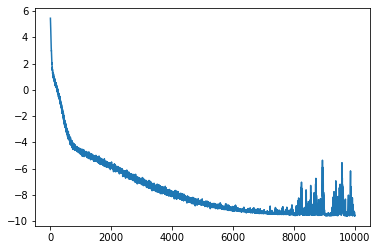

In [13]:
plt.plot(losses)

In [14]:
num = 25
_X = np.linspace(0, 1, num=num)
_X, _Y = np.meshgrid(_X, _X)

X = np.vstack((_X.flatten(), _Y.flatten())).T

U, V = sess.run([u, v], feed_dict={
    x: X
})

U = U.reshape((num, num))
V = V.reshape((num, num))

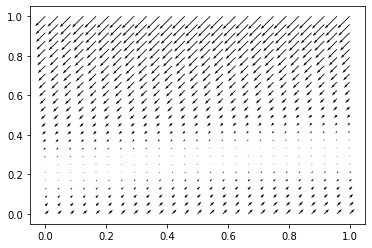

In [15]:
plt.quiver(_X, _Y, U, V)
plt.show()

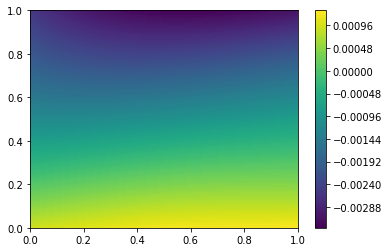

In [16]:
plt.contourf(_X, _Y, U, 150)
plt.colorbar()
plt.show()

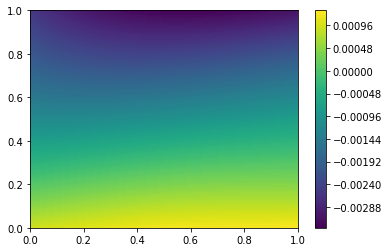

In [17]:
plt.contourf(_X, _Y, V, 150)
plt.colorbar()
plt.show()